# Reproducing baseline model results

- **Author**: Jack Oliver
- **Date**: 28/04/2024
- **Purpose**: Reproduce the results from [Manore _et al_. (2015)](https://www.tandfonline.com/doi/full/10.1080/17513758.2015.1005698).

## Imports & data

In [1]:
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm_notebook

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt

from model import *

### Experiments

There are four scenarios in total — baseline (homogeneous patches); heterogeneous patches: high, medium, and low movement.

#### Baseline (homogeneous) patch model

In [2]:
def baseline():
    return BaselineModel(
            k=3,
            timestep=0.25,
            movement_dist=lambda : np.random.lognormal(-1999/4000000, np.log(1.001)),
            sigma_h_arr=np.array([19, 19, 19]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([1000, 1000, 1000]),
            patch_densities=np.array([1/3, 1/3, 1/3]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            mu_h_dist=lambda : np.random.lognormal(-1.79226, np.log(1.001)),
            nu_h_dist=lambda : np.random.lognormal(-1.60994, np.log(1.001)),
            total_time=200,
            mosquito_timestep=.005
        )

#### High movement

In [3]:
def high_mvmt():
    return BaselineModel(
            k=3,
            movement_dist=lambda : np.random.lognormal(-1999/4_000_000, np.log(1.001)),
            timestep=0.25,
            sigma_h_arr=np.array([5, 19, 30]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([750, 1500, 3750]),
            patch_densities=np.array([1/2, 1/3, 1/6]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            mu_h_dist=lambda : np.random.lognormal(-1.79226, np.log(1.001)),
            nu_h_dist=lambda : np.random.lognormal(-1.60994, np.log(1.001)),
            total_time=200,
            mosquito_timestep=.005
        )

#### Medium

In [4]:
def medium_mvmt():
    return BaselineModel(
            k=3,
            movement_dist=lambda : np.random.lognormal(-2.30308, np.log(1.001)),
            timestep=0.25,
            sigma_h_arr=np.array([5, 19, 30]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([750, 1500, 3750]),
            patch_densities=np.array([1/2, 1/3, 1/6]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            mu_h_dist=lambda : np.random.lognormal(-1.79226, np.log(1.001)),
            nu_h_dist=lambda : np.random.lognormal(-1.60994, np.log(1.001)),
            total_time=200,
            mosquito_timestep=.005
        )

#### Low

In [5]:
def low_mvmt():
    return BaselineModel(
            k=3,
            movement_dist=lambda : np.random.lognormal(-4.60567, np.log(1.001)),
            timestep=0.25,
            sigma_h_arr=np.array([5, 19, 30]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([750, 1500, 3750]),
            patch_densities=np.array([1/2, 1/3, 1/6]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            mu_h_dist=lambda : np.random.lognormal(-1.79226, np.log(1.001)),
            nu_h_dist=lambda : np.random.lognormal(-1.60994, np.log(1.001)),
            total_time=200,
            mosquito_timestep=.005
        )

## Running models

In [21]:
NAMES = ["Baseline", "High movement", "Medium movement", "Low movement"]

In [22]:
def run_models(num_runs=100,
               generators=[baseline, high_mvmt, medium_mvmt, low_mvmt],
               names=["Baseline", "High movement", "Medium movement", "Low movement"]):
    """Run the different models repeatedly."""
    assert len(generators) == len(names)
    
    data = {name: None for name in names}

    for (name, model_generator) in zip(names, generators):
        print(f"Running {name} model...")
        data[name] = [None] * num_runs
        
        for i in tqdm_notebook(range(num_runs)):
            m = model_generator()
            res, _ = m.run()

            data[name][i] = res

    return data

In [8]:
data = run_models(100)

Running Baseline model...


  0%|          | 0/100 [00:00<?, ?it/s]

Running High movement model...


  0%|          | 0/100 [00:00<?, ?it/s]

Running Medium movement model...


  0%|          | 0/100 [00:00<?, ?it/s]

Running Low movement model...


  0%|          | 0/100 [00:00<?, ?it/s]

### Deriving model statistics

In [9]:
infection_counts = {name: [data[name][i]["total_infected"] for i in range(len(data[name]))] for name in NAMES}

peak_infection_times = {name: {patch: [np.argmax(data[name][i]["num_infected"][patch])/4 for i in range(len(data[name]))] for patch in range(3)} for name in NAMES}

num_infectious_peak  = {name: {patch: [np.max(data[name][i]["num_infected"][patch]) for i in range(len(data[name]))] for patch in range(3)} for name in NAMES}

# epidemic_peak_times  = {name: [np.argmax(np.sum(list(data[name][0]["num_infected"].values()), axis=0))] for name in NAMES}

## Results

#### Figure 3. Total average infected

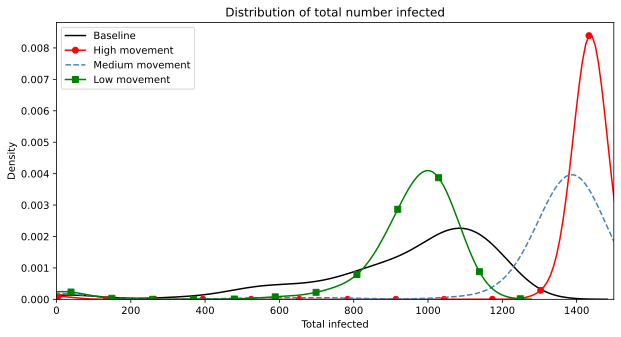

In [13]:
plt.figure(figsize=(10,5))

for (name, color, args) in zip(["Baseline", "High movement", "Medium movement", "Low movement"],
                                ["black", "red", "steelblue", "green"],
                                [{}, {"marker": 'o', "markevery": 15}, {"linestyle": 'dashed'}, {"marker": 's', "markevery": 15}]):
    sns.kdeplot(infection_counts[name], bw_adjust=.75, color=color, label=name, **args)
# sns.kdeplot(infection_counts["Baseline"], bw_adjust=bw_adjust, color="black", label="Baseline")
# sns.kdeplot(infection_counts["High movement"], bw_adjust=bw_adjust, color="red", marker='o', label="High movement")


plt.xlim(0, 1500)
plt.xlabel("Total infected")
plt.title("Distribution of total number infected")
plt.legend()
plt.show()

#### Figure 4. Total hosts initially infected

<mark>TODO: I don't know what this figure means.</mark>

#### Figure 5. Estimated basic reproduction number

<mark>TODO: I don't know how they derived this.</mark>

#### Figure 6. Distributions for timing of epidemic peak

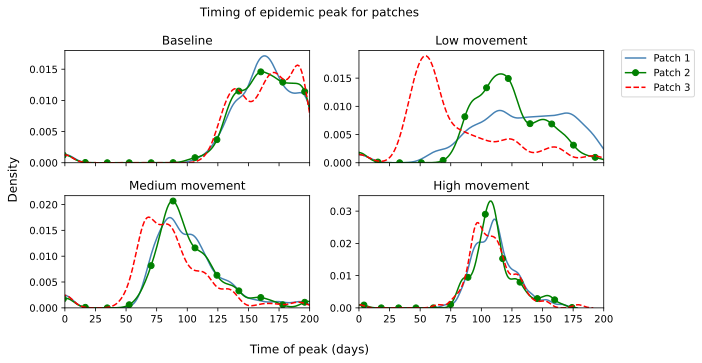

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8.75,5))
temp_names = [NAMES[0]] + NAMES[1:][::-1]

cur_name = 0
for row in axs:
    for col in row:
        for (patch, name, color, args) in zip(range(3), range(1,4), ["steelblue", "green", "red"], [{}, {"marker": "o", "markevery": 15}, {"linestyle": "dashed"}]):
            sns.kdeplot(peak_infection_times[temp_names[cur_name]][patch], ax=col, bw_adjust=.5, color=color, label=f"Patch {name}" if cur_name == 0 else None, **args)

        col.set_xlim(0,200)
        
        col.set_xlabel("")
        col.set_ylabel("")

        col.set_title(temp_names[cur_name])
        
        cur_name += 1

fig.suptitle("Timing of epidemic peak for patches")

fig.supxlabel("Time of peak (days)")
fig.supylabel("Density")
fig.legend(bbox_to_anchor=[1.12, 0.875])
fig.tight_layout()

#### Figure 7. Number of people infectious at epidemic peak time

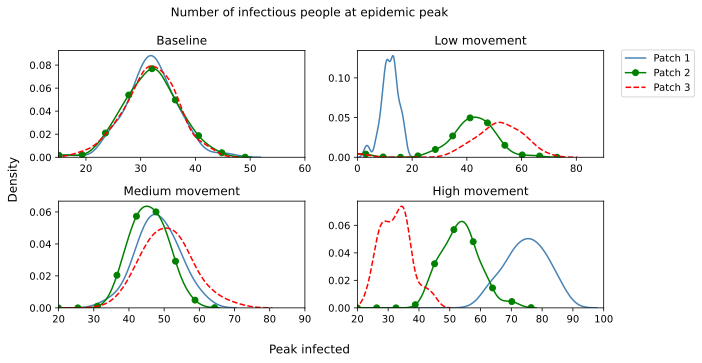

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8.75,5))
temp_names = [NAMES[0]] + NAMES[1:][::-1]
lims = [(15,60), (0,90), (20,90), (20,100)]

cur_name = 0
for row in axs:
    for col in row:
        for (patch, name, color, args) in zip(range(3), range(1,4), ["steelblue", "green", "red"], [{}, {"marker": "o", "markevery": 15}, {"linestyle": "dashed"}]):
            sns.kdeplot(num_infectious_peak[temp_names[cur_name]][patch], ax=col, bw_adjust=.75, color=color, label=f"Patch {name}" if cur_name == 0 else None, **args)

        col.set_xlim(*lims[cur_name])
        
        col.set_xlabel("")
        col.set_ylabel("")

        col.set_title(temp_names[cur_name])
        
        cur_name += 1

plt.suptitle("Number of infectious people at epidemic peak")

fig.supxlabel("Peak infected")
fig.supylabel("Density")
fig.legend(bbox_to_anchor=[1.12, 0.875])
fig.tight_layout()

## Individual model runs

In [27]:
runs = 20
data = run_models(runs, [high_mvmt], ["high movement"])

Running high movement model...


  0%|          | 0/20 [00:00<?, ?it/s]

In [53]:
x = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[2, 1, 3], [4, 4, 4], [9, 9, 9]]
])

# np.std(x, axis=2)

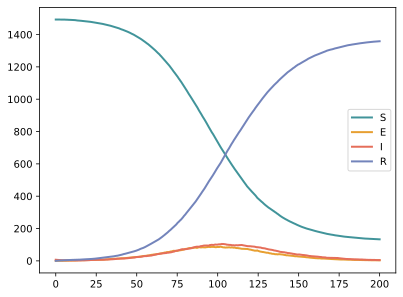

In [55]:
runs = 20
t = np.linspace(0, 200, 800)
avgs = np.mean([data["high movement"][i]["agent_disease_counts"] for i in range(runs)], axis=0)

for i, c in zip(range(4), ["#41949A", "#e79f31", "#E56E5A", "#7384BB"]):
    plt.plot(t, avgs[i], label=["S","E","I","R"][i], color=c, linewidth=2)

    # ci = 1.96 * np.std([data["high movement"][j]["agent_disease_counts"][i] for j in range(runs)])/np.sqrt(runs)
    # plt.gca().fill_between(t, np.maximum(avgs[i]-ci, 0), avgs[i]+ci, color=c, alpha=.1)
    
plt.legend()
plt.show()